- Authors: Ray Donner and Seth Johnson
- Date: May 25, 2023
- Content: This file is a conglomerate of all the machine learning algorithms that we run and collect data on. This will include the following algorithms:
    - Categorical Naive-Bayes
    - Support Vector Machines
    - Decision Trees
    - Neural Network
    - Convolutional Neural Network
- The goal is to analyze this with our new dataset COVID19_APK_Data_06-2023.csv and compare train/test performace, as well as provide statistical analysis to compare COVIDMalware.pdf dataset to ours.

RUN ME FIRST

length of permSpread: 464
total length of labels: 471


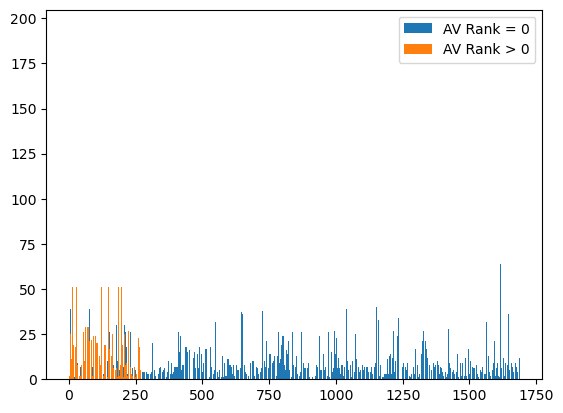

/home/sdj81/PyWorkspace/2023_REU_Workspace


In [38]:
"""
### Package handling
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import pylab as pl
import random
from pprint import pprint
from sklearn import preprocessing

"""
### Site for Tensorflow reference: https://www.tensorflow.org/guide/distributed_training
"""

models = {
    "Categorical NB": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0 # model.fit().history.items()
    },
    "SVM": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0
    },
    "dTree": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0
    },
    "DNN": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0
    },
    "CNN": {
        "Epoch_duration": [20],
        "duration": 1,
        "history": 0
    },
}

# TODO:
# - Std Dev, Std Err to compare my processed data with the data provided by COVIDMalware.pdf
#      - this can help confirm that what I did was right
#      - Check Stats 305 stuff to provide formulas and context for these values
# - normalize, proportionalize data to plot
# - Plot the data I've collected
#   - Compare total requested per apk
#   - compare types of perms requested per apk
#   - F.E: Compare benign vs malicious

keys = [] # Lables of CSV data that is NOT the permissions requested by a given APK file
benignSpread = [] # permission spread requested by benign APK files
maliciousSpread = [] # permission spread requested by APK files flagged by AV software

print(os.getcwd()) # Displaying script's CWD

apkData = pd.read_csv("COVID19_APK_Data_06-2023.csv") # Calling CSV and filling DataFrame (DF)

"""
### Scraping our CSV's DF
"""
# Building keys array for parsinng reference later
for i in range(7):
    keys.append(apkData.keys()[i])

# print(keys)

permSpread = apkData.loc[0].keys().drop(i for i in keys).values # Key values for the permissions requested by a given APK file
apks = apkData["APK File"].values # Pulling APK files to correlate labels
labels = apkData["AV Rank"].values # Referring to a specific column in a DF
perms = [apkData.loc[i].drop((i for i in keys)).values for i in range(len(apkData))] # How would I parse this to exclude the first 7 columns?

totalAPKs = len(labels)
totalBadAPKs = sum([1 if item > 0 else 0 for item in labels])

# print(f"length of apks array: {len(apks)}")
# print(f"length of perms array: {len(perms)}")
# print(f"length of labels array: {len(labels)}")

# print(f"length of permissions in subarray: {len(perms[0])}")
# print(permSpread)
print(f"length of permSpread: {len(permSpread)}")
print(f"total length of labels: {len(apkData.keys())}")

with open("stupid.txt", "w") as outFile:
    for i in range(len(apks)):
        outFile.write("Application: " + apkData.loc[i].loc["Application Name"] + "\n")
        outFile.write("Package: " + apkData.loc[i]["Package Name"] + "\n")
        outFile.write(f"APK File: {apks[i]}" + "\n")
        outFile.write(f"AV Rank: {labels[i]}" + "\n")
        outFile.write(f"Total Permissions Requested: {sum(perms[i])}" + "\n")
        outFile.write(f"Permission Spread: {perms[i]}" + "\n")
        outFile.write("\n")

"""
### Plotting the total permissions requested by a given apk, organized based off an AV rank > 0
"""

# Sorting the permission spread between malicious and benign
for i in range(len(apks)):
    if labels[i] > 0:
        # print(f"APK File {apks[i]} is malicious!")
        maliciousSpread.append(perms[i])
    else:
        benignSpread.append(perms[i])

plt.bar([i for i in range(len([sum(i) for i in benignSpread]))], [sum(i) for i in benignSpread], label="AV Rank = 0")
plt.bar([i for i in range(len([sum(i) for i in maliciousSpread]))], [sum(i) for i in maliciousSpread],label="AV Rank > 0")
plt.legend()
plt.savefig("TotalPermissionsGraphed.png", dpi=300, bbox_inches = "tight")
plt.show()

# benignSpreadSums = []
# for perm in permSpread[:20]:
#     benignSpreadSums.append(apkData[perm].sum())

# plt.barh(permSpread[:20], benignSpreadSums)
# plt.ylabel("Permissions requested by APK")
# plt.xlabel("Frequency of APKs")
# plt.savefig("PermSpread.png", dpi=300, bbox_inches = "tight")
# plt.show()

# OR
# apkData["Total permission requests"].plot(kind="hist")
# plt.show()

# How many APKs are malicious?
# print(f"We analyzed {totalAPKs} APKs")
# print(f"Out of that, {totalBadAPKs} were flagged as malicious. This is according to the COVIDMalware.pdf dataset.")
# print(f"Which means about {((totalBadAPKs / totalAPKs) * 100):.2f}% of all analyzed APKs are labeled as malicious.")

# print(features_df)
# print(label_df)

apps = {}


# pprint(apps)

Statistics for our Dataset

In [ ]:
# TODO:
"""
- Percentage of APKs that have been flagged as malware
- Whether or not apk has AVRank > 0
- Percentage of Apps that have malicious APKs
- Std error/dev given total APKs in dataset compared to analyzed APKs and APKs that we failed to analyze
- Graph the normalized quantity of APKs that request a given permission over the Permission Spread
- Graph the normalized quantity of APKs that have a given value of Total Permissions Requested field in COVID19_APK_DATA csv
"""

# pyplot.plt()

Scikit Learn prep

In [ ]:
"""
### Package handling
"""
from sklearn.naive_bayes import GaussianNB  # WE WILL NOT BE USING GAUSSIAN N-B
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # importing the Classifier module specifically
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Neural Network Prep

In [ ]:
"""
### Package handling
"""
import tensorflow as tf
import keras
from keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
    Embedding,
    LSTM
)
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import utils
from keras.models import Sequential

"""
### Can we use the GPU?
"""

if tf.test.gpu_device_name():
    print(f'GPU installed. Good Job!\nGPU Device: {tf.test.gpu_device_name()}')
else:
    print(" No GPU found that can run TF.")

"""
### Overridden callback class "timer" for catching epoch/total time
"""
class timer(keras.callbacks.callbacks):
    import time
    def __init__(self): # initalized callback
        super(timer, self).__init__() # remember inheritance from OOP

    # training methods
    def on_train_begin(self, logs=None):
        self.start_train=time.time()
    def on_train_end(self, logs=None):
        stop_train = time.time()
        train_duration = stop_train - start_train
        # Calculates metrics
        tr_hours = tr_duration // 3600
        tr_minutes = (tr_duration - (hours * 3600)) // 60
        tr_seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        # Generates message of string
        msg = f"Elapsed time: {str(tr_hours)}:{str(tr_minutes)}:{str(tr_seconds)}"
        print(msg)
    
    # batch training methods <-- might not need this
    def on_train_batch_begin(self, batch, logs=None):
        pass
    def on_train_batch_end(self, batch, logs=None):
        pass

    # epoch methods
    def on_epoch_begin(self, epoch, logs=None):
        self.start_epoch = time.time()
    def on_epoch_end(self, epoch, logs=None):
        stop_epoch = time.time()
        epoch_duration = stop_epoch - start_epoch
        msg = f"Epoch {epoch + 1} trained for {epoch_duration} seconds"
        print(msg)

    # prediction methods <-- this might be useful in the long run during CrossVal
    def on_predict_begin(self, logs=None):
        pass
    def on_predict_end(self, logs=None):
        pass

Visualizing performance

In [ ]:
"""
### Visualizing model performace
"""
for val, data in history.history.items():
  plt.plot(data)
  plt.title(val)
  plt.show()
  print()